In [1]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patches import Rectangle
from matplotlib.colors import Normalize
from scipy.spatial.distance import cdist
from pyproj import Proj, transform
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.img_tiles import GoogleTiles
import oci_etl as etl

In [2]:
# NetCDF
file_path = 'C:/Users/werthemo/Downloads/PACE_OCI.20240812T110111.L2.OC_IOP.V2_0.NRT.nc'
dataset = nc.Dataset(file_path)

### 1. L2 IOP data product

C:\Users\werthemo\AppData\Local\Temp\ipykernel_24264\1213113087.py:25: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plot = ax.pcolormesh(lons_swiss, lats_swiss, bbp_data, cmap='viridis', norm=norm, shading='auto')


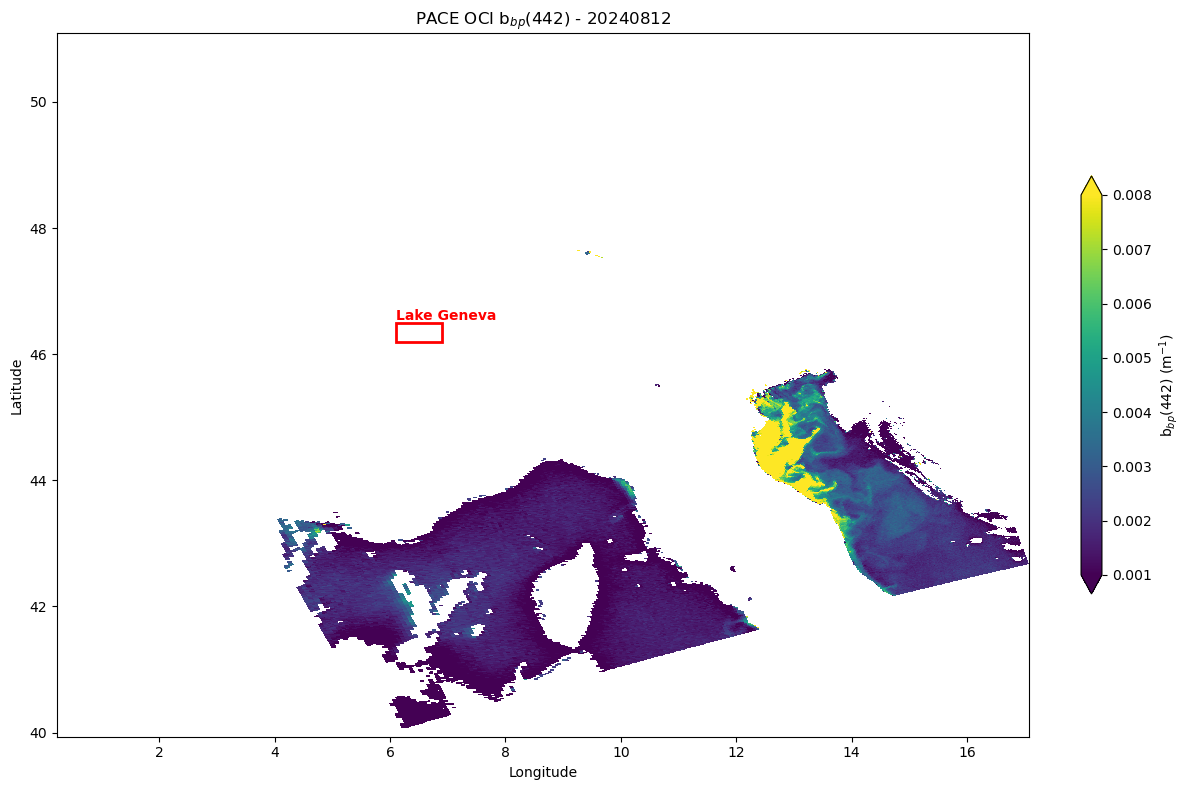

In [4]:
# Approximate latitude and longitude ranges for Switzerland
swiss_lat_min, swiss_lat_max = 45.8, 47.8
swiss_lon_min, swiss_lon_max = 5.9, 10.5

# lats, lons
lats = dataset.groups['navigation_data'].variables['latitude'][:]
lons = dataset.groups['navigation_data'].variables['longitude'][:]

# find indices for the Switzerland region
lat_indices = np.where((lats >= swiss_lat_min) & (lats <= swiss_lat_max))
lon_indices = np.where((lons >= swiss_lon_min) & (lons <= swiss_lon_max))

# extract the 'bbp_442' variable from the 'geophysical_data' group
bbp_data = dataset.groups['geophysical_data'].variables['bbp_442'][lat_indices[0].min():lat_indices[0].max()+1, 
                                                                   lon_indices[1].min():lon_indices[1].max()+1]

# subset lat, lon to CH
lats_swiss = lats[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]
lons_swiss = lons[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
norm = Normalize(vmin=0.001, vmax=0.008)

plot = ax.pcolormesh(lons_swiss, lats_swiss, bbp_data, cmap='viridis', norm=norm, shading='auto')

ax.set_title(r'PACE OCI b$_{bp}$(442) - 20240812')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cbar = plt.colorbar(plot, ax=ax, label='b$_{bp}$(442) (m$^{-1}$)', extend='both', fraction=0.02, shrink=0.8)

# approximate coordinates for Lake Geneva
geneva_lon_min, geneva_lon_max = 6.1, 6.9
geneva_lat_min, geneva_lat_max = 46.2, 46.5

# rectangle around Lake Geneva
rect = Rectangle((geneva_lon_min, geneva_lat_min), 
                 geneva_lon_max - geneva_lon_min, 
                 geneva_lat_max - geneva_lat_min,
                 fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

ax.text(geneva_lon_min, geneva_lat_max, 'Lake Geneva', color='red', fontweight='bold', 
        verticalalignment='bottom', horizontalalignment='left')

plt.tight_layout()
plt.show()

In [7]:
# Different product
file_path = 'C:/Users/werthemo/Downloads/PACE_OCI.20240705T115820.L2.OC_IOP.V2_0.NRT.nc'
dataset = nc.Dataset(file_path)

C:\Users\werthemo\AppData\Local\Temp\ipykernel_24264\553510190.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plot = ax.pcolormesh(lons_swiss, lats_swiss, bbp_data, cmap='viridis', norm=norm, shading='auto')


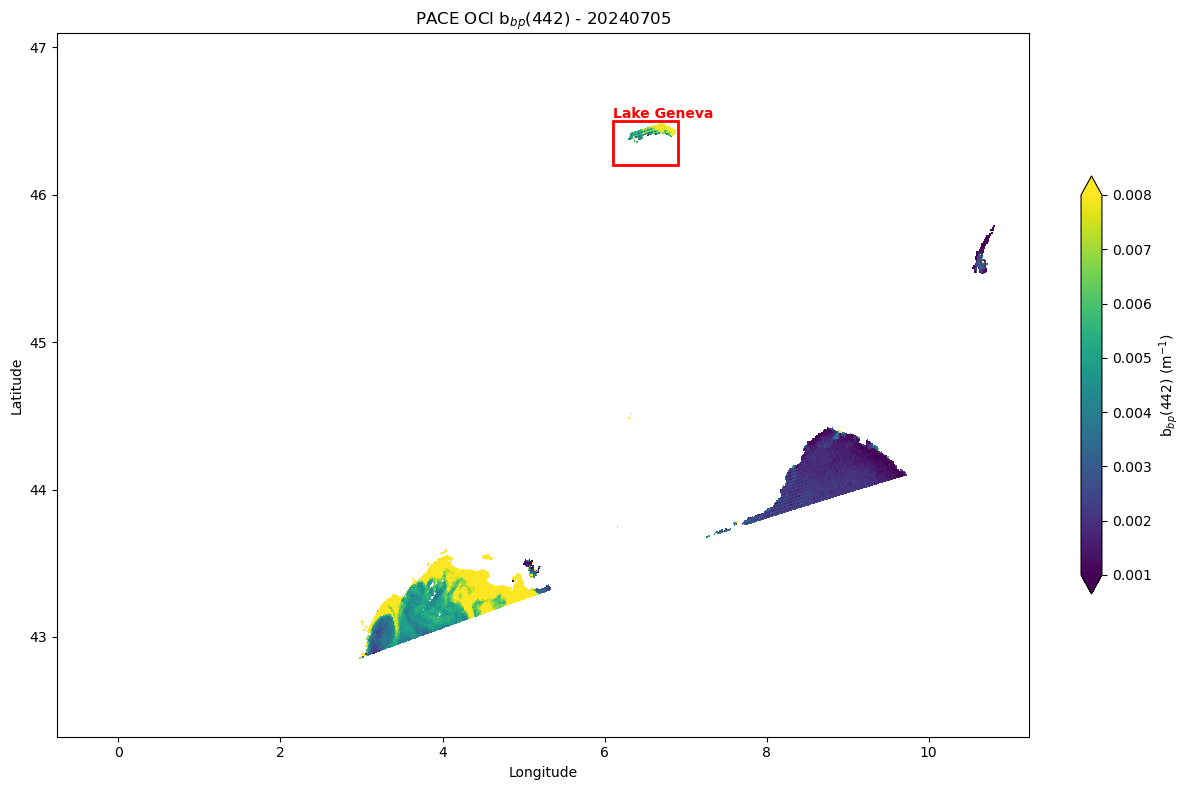

In [8]:
# Get latitude and longitude data
lats = dataset.groups['navigation_data'].variables['latitude'][:]
lons = dataset.groups['navigation_data'].variables['longitude'][:]
lat_indices = np.where((lats >= swiss_lat_min) & (lats <= swiss_lat_max))
lon_indices = np.where((lons >= swiss_lon_min) & (lons <= swiss_lon_max))
bbp_data = dataset.groups['geophysical_data'].variables['bbp_442'][lat_indices[0].min():lat_indices[0].max()+1, 
                                                                   lon_indices[1].min():lon_indices[1].max()+1]
lats_swiss = lats[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]
lons_swiss = lons[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]

fig, ax = plt.subplots(figsize=(12, 8))
plot = ax.pcolormesh(lons_swiss, lats_swiss, bbp_data, cmap='viridis', norm=norm, shading='auto')

ax.set_title(r'PACE OCI b$_{bp}$(442) - 20240705')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cbar = plt.colorbar(plot, ax=ax, label='b$_{bp}$(442) (m$^{-1}$)', extend='both', fraction=0.02, shrink=0.8)

# Add rectangle around Lake Geneva
rect = Rectangle((geneva_lon_min, geneva_lat_min), 
                 geneva_lon_max - geneva_lon_min, 
                 geneva_lat_max - geneva_lat_min,
                 fill=False, edgecolor='red', linewidth=2)
ax.add_patch(rect)

ax.text(geneva_lon_min, geneva_lat_max, 'Lake Geneva', color='red', fontweight='bold', 
        verticalalignment='bottom', horizontalalignment='left')

plt.tight_layout()
plt.show()

## 2. Zoom to Geneva and plot available b_bp - product cut off in Geneva

In [12]:
file_path = 'C:/Users/werthemo/Downloads/PACE_OCI.20240705T115820.L2.OC_IOP.V2_0.NRT.nc'
dataset = nc.Dataset(file_path)

C:\Users\werthemo\AppData\Local\Temp\ipykernel_24264\1413422907.py:50: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


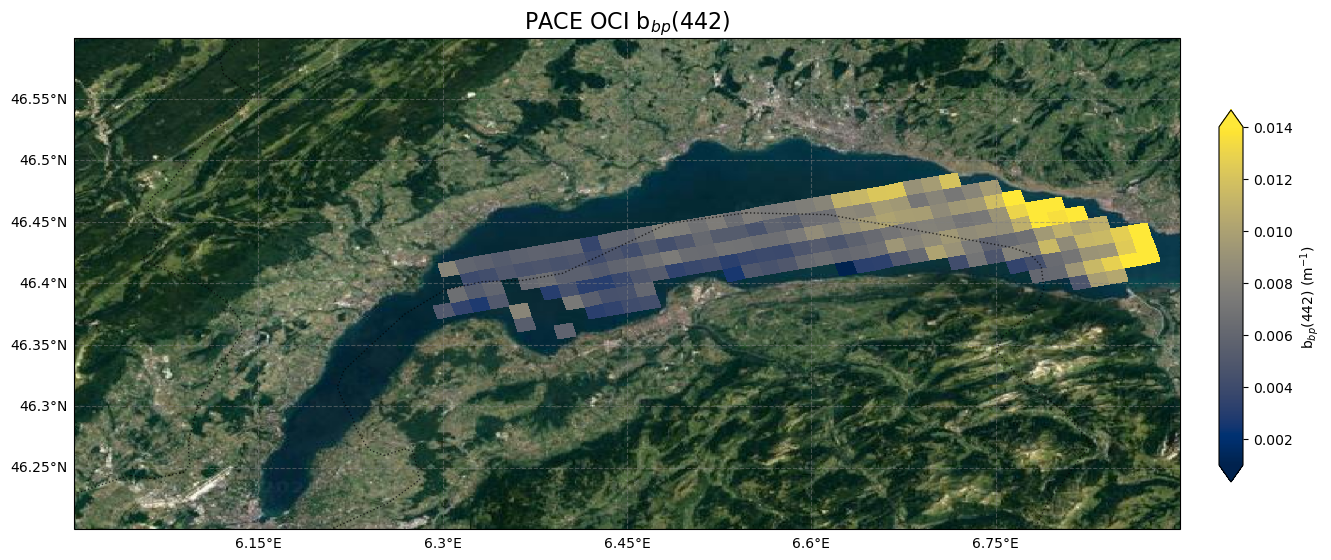

In [13]:
# Define latitude and longitude ranges for Lake Geneva
nw_lat, nw_lon = 46.6, 6.0
se_lat, se_lon = 46.2, 6.9

lats = dataset.groups['navigation_data'].variables['latitude'][:]
lons = dataset.groups['navigation_data'].variables['longitude'][:]
lat_indices = np.where((lats >= se_lat) & (lats <= nw_lat))
lon_indices = np.where((lons >= nw_lon) & (lons <= se_lon))
bbp_data = dataset.groups['geophysical_data'].variables['bbp_442'][lat_indices[0].min():lat_indices[0].max()+1,
                                                                   lon_indices[1].min():lon_indices[1].max()+1]
lats_geneva = lats[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]
lons_geneva = lons[lat_indices[0].min():lat_indices[0].max()+1, lon_indices[1].min():lon_indices[1].max()+1]

# Plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# Google Maps background
class GoogleSatellite(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = f'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
        return url
google_sat = GoogleSatellite()

# add background
ax.add_image(google_sat, 10)  # zoom level


norm = Normalize(vmin=0.001, vmax=0.014)
plot = ax.pcolormesh(lons_geneva, lats_geneva, bbp_data, cmap='cividis', norm=norm,
                     shading='auto', transform=ccrs.PlateCarree(), alpha=1.0)

ax.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':', alpha=0.7)

ax.set_extent([nw_lon, se_lon, se_lat, nw_lat], crs=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, linestyle='--', color='gray', alpha=0.5)
gl.top_labels = False
gl.right_labels = False

cax = fig.add_axes([ax.get_position().x1 + 0.12, 
                    ax.get_position().y0 + 0.015, 
                    0.02, 
                    ax.get_position().height * 0.9])  
cbar = plt.colorbar(plot, cax=cax, label='b$_{bp}$(442) (m$^{-1}$)', extend='both')

ax.set_title(r'PACE OCI b$_{bp}$(442)', fontsize=16)

plt.tight_layout()
plt.show()

### 3. Global PAR L3 4KM product? 

In [15]:
file_path = 'C:/Users/werthemo/Downloads/PACE_OCI.20240830.L3m.DAY.PAR.V2_0.par_day_planar_above.4km.NRT.nc'
dataset = nc.Dataset(file_path)

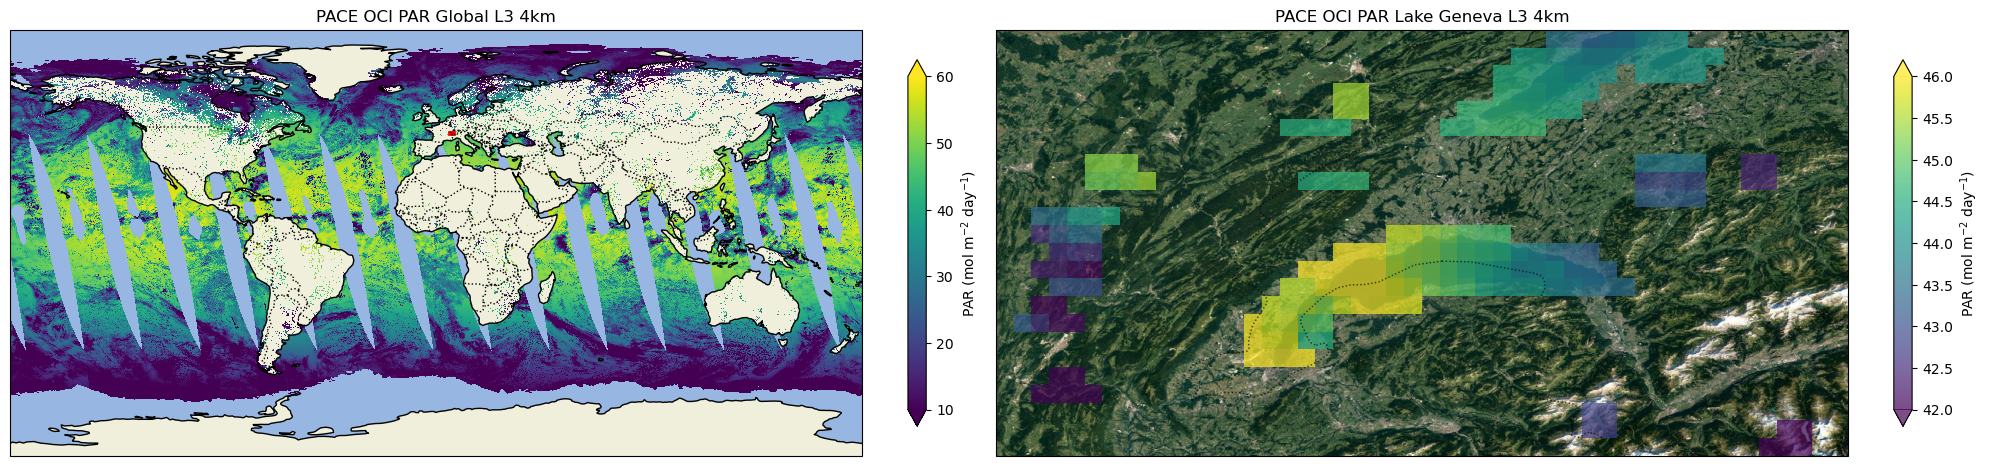

In [16]:
# extract the 'par_day_planar_above' variable
par_data = dataset.variables['par_day_planar_above'][:]

lats = dataset.variables['lat'][:]
lons = dataset.variables['lon'][:]

# wider region of interest around Lake Geneva
nw_lat, nw_lon = 47.0, 5.5
se_lat, se_lon = 46.0, 7.5
lat_indices = np.where((lats >= se_lat) & (lats <= nw_lat))[0]
lon_indices = np.where((lons >= nw_lon) & (lons <= se_lon))[0]
roi_data = par_data[lat_indices[0]:lat_indices[-1]+1, lon_indices[0]:lon_indices[-1]+1]
roi_lats = lats[lat_indices]
roi_lons = lons[lon_indices]

# mesh grid for plotting
roi_lon, roi_lat = np.meshgrid(roi_lons, roi_lats)

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Color scales
global_norm = Normalize(vmin=10, vmax=60)
regional_norm = Normalize(vmin=42, vmax=46)

# Global PAR data
global_plot = ax1.pcolormesh(lons, lats, par_data, cmap='viridis', norm=global_norm, shading='auto', transform=ccrs.PlateCarree())
ax2.set_title('PACE OCI PAR global L3 4km')
ax1.set_global()
ax1.set_title('PACE OCI PAR Global L3 4km')
ax1.add_feature(cfeature.LAND)
ax1.add_feature(cfeature.OCEAN)
ax1.add_feature(cfeature.COASTLINE)
ax1.add_feature(cfeature.BORDERS, linestyle=':')
plt.colorbar(global_plot, ax=ax1, label=r'PAR (mol m$^{-2}$ day$^{-1}$)', extend='both', fraction=0.02, shrink=0.8)

# Rectangle to show zoomed area
rect = Rectangle((nw_lon, se_lat), se_lon - nw_lon, nw_lat - se_lat,
                 fill=False, ec='red', lw=2, transform=ccrs.PlateCarree())
ax1.add_patch(rect)

# Google Maps satellite background
class GoogleSatellite(GoogleTiles):
    def _image_url(self, tile):
        x, y, z = tile
        url = f'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
        return url

google_sat = GoogleSatellite()

# Plot the Geneva area with background
ax2.add_image(google_sat, 10)  
zoomed_plot = ax2.pcolormesh(roi_lon, roi_lat, roi_data, cmap='viridis', norm=regional_norm,
                             shading='auto', transform=ccrs.PlateCarree(), alpha=0.7)
ax2.set_title('PACE OCI PAR Lake Geneva L3 4km')
ax2.set_extent([nw_lon, se_lon, se_lat, nw_lat])
ax2.add_feature(cfeature.BORDERS.with_scale('10m'), linestyle=':', alpha=0.7)
plt.colorbar(zoomed_plot, ax=ax2, label=r'PAR (mol m$^{-2}$ day$^{-1}$)', extend='both', fraction=0.02, shrink=0.8)

ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Latitude')

plt.tight_layout()
plt.show()